# Подготовка

Подключаем библиотеку Pandas, которую будем использовать для анализа данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc

Настраиваем стиль отображения графиков

In [ ]:
plt.style.use('grayscale')

Добавим переменную с путем к папке, где лежат исходные датасеты.

Для последующей проверки достаточно заменить эту переменную на адрес локальной папки с файлами

In [ ]:
PATH = 'C://Users//smirn//Desktop//'

# Анализ данных в файле `lectures.csv`

Описание данных в файле

`lectures.csv`: metadata for the lectures watched by users as they progress in their education.

*   `lecture_id`: внешний ключ для столбца content_type_id в train.csv, если тип контента - лекция (1).
*   `part`: раздел, к которому относится лекция.
*   `tag`: один тег для каждой лекции. Значения тегов не представлены, но их достаточно для кластеризации лекций.
*   `type_of`: краткое описание основной цели лекции.

Формируем DataFrame из данных файла

In [132]:
df_l = pd.read_csv(PATH + 'lectures.csv', sep=',')

Просмотрим информацию о сформированном df

In [133]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Видим, что таблица состоит из 418 строк и 4 столбцов

Также видим, что первые три столбца имеют Dtype int64, последний - object




Проверим данные на наличие пропусков

In [ ]:
df_l.isna().sum() 

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

Как видим, пропуски отсутствуют

Проверим на наличие дубликатов

In [ ]:
df_l.duplicated().sum()

0

Дубликаты также отсутствуют

Судя по описанию полученному в методе `.info()` последние три столбца носят категориальный характер данных. 

Для проверки данной гипотезы просмотрим количество уникальных значений в данных столбцах

In [ ]:
for col in df_l.columns:
  print("Количество уникальных значений в столбце " + col + " - " + str(df_l[col].nunique()))

Количество уникальных значений в столбце lecture_id - 418
Количество уникальных значений в столбце tag - 151
Количество уникальных значений в столбце part - 7
Количество уникальных значений в столбце type_of - 4


Видим, что столбцы `part` и `type_of` содержат мало уникальных значений в сравнении с общим количеством строк. Посмотрим, что это за значения

In [ ]:
df_l['part'].value_counts()

5    143
6     83
2     56
1     54
7     32
4     31
3     19
Name: part, dtype: int64

Видим, что значения признака представлены в числовом формате. В данном случае смена типа данных на категориальные не даст существенной экономии памяти и роста производительности

In [ ]:
df_l['type_of'].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

Видим, что значения признака представлены в текстовом формате. Для экономии памяти и увеличения производительности сделаем данный столбец категориальным. Перед этим сделаем копию df

In [ ]:
df_l_1 = df_l.copy()

In [ ]:
df_l_1['type_of'] = df_l_1['type_of'].astype("category")

Проверим корректность отработки операции и экономию памяти

In [ ]:
df_l_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lecture_id  418 non-null    int64   
 1   tag         418 non-null    int64   
 2   part        418 non-null    int64   
 3   type_of     418 non-null    category
dtypes: category(1), int64(3)
memory usage: 10.5 KB


In [ ]:
economy = int((13.2-10.5) * 100 / 13.2)
print("Использование памяти оптимизировано на " + str(economy) + "%")

Использование памяти оптимизировано на 20%


## `lectures.csv` - `part`

В атрибуте указывается раздел, к которому относится лекция

### Частота различных разделов

Построим круговую диаграмму по частоте разных типов лекций

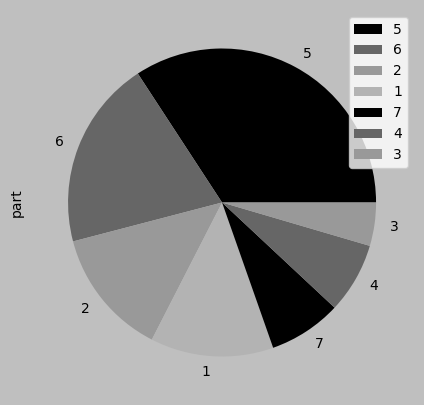

In [135]:
plt.figure(figsize=(12,5))
df_l['part'].value_counts().plot.pie()
plt.legend()
plt.show()

#### **Вывод**

Видим, что намболее часто встречающиеся разделы - 5 и 6

## `lectures.csv` - `type_of`

В атрибуте содержится краткое описание основной цели лекции.

### Частота различных типов лекций

Построим столбчатую диаграмму по частоте разных типов лекций

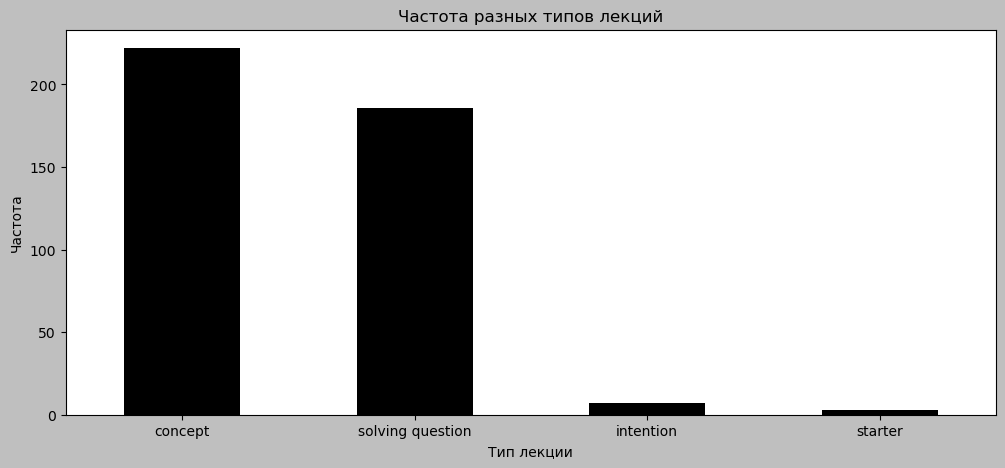

In [ ]:
plt.figure(figsize=(12,5))
df_l['type_of'].value_counts().plot.bar()
plt.title("Частота разных типов лекций")
plt.xlabel("Тип лекции")
plt.ylabel("Частота")
plt.xticks(rotation=0)
plt.show()

#### **Вывод**

Со значительным преимуществом преобладают лекции с типом 'concept' и 'solving question'

# Анализ данных в файле `questions.csv`

Описание данных в файле

`questions.csv`: metadata for the questions posed to users.

*   `question_id`: - question_id: внешний ключ для столбца content_type_id в train.csv, если тип контента - вопрос (0).
*   `bundle_id`: идентификатор совместного набора вопросов.
*   `correct_answer`: правильный ответ на вопрос. Можно сравнить со столбцом user_answer в train.csv, чтобы проверить, верно ли ответил студент.
*   `part`: соответствующий раздел теста TOEIC.
*   `tags`: один или несколько подробных тегов для каждого вопроса. Значения тегов не представлены, но их достаточно для кластеризации вопросов.

Формируем DataFrame из данных файла

In [136]:
df_q = pd.read_csv(PATH + 'questions.csv', sep=',')

Просмотрим информацию о сформированном df

In [137]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


видим, что таблица состоит из 13523 строк и 5 столбцов
видим, что первые 4 столбца имеют Dtype int64, последний - object




Проверим данные на наличие пропусков

In [ ]:
df_q.isna().sum() 

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

Как видим, в столбце `tags` пропущено 1 значение

Посмотрим на строку с пропуском

In [ ]:
df_q[df_q.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


В описании столбца сказано, что должен быть хотя бы один тэг, по всей видимости в данной строке допущена ошибка. В связи с этим предлагаю удалить данную строку

In [ ]:
df_q_1 = df_q.copy()
df_q_1 = df_q_1.drop(labels = [10033], axis = 0)
df_q_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13522 non-null  int64 
 1   bundle_id       13522 non-null  int64 
 2   correct_answer  13522 non-null  int64 
 3   part            13522 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 633.8+ KB


In [ ]:
df_q_1.isna().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              0
dtype: int64

Теперь пропуски в df отсутствуют

Проверим на наличие дубликатов

In [ ]:
df_q_1.duplicated().sum()

0

Дубликаты отсутствуют

Посмотрим на содержащиеся в таблице данные

In [ ]:
for col in df_q_1.columns:
  print("Количество уникальных значений в столбце " + col + " - " + str(df_q_1[col].nunique()))

Количество уникальных значений в столбце question_id - 13522
Количество уникальных значений в столбце bundle_id - 9764
Количество уникальных значений в столбце correct_answer - 4
Количество уникальных значений в столбце part - 7
Количество уникальных значений в столбце tags - 1519


Видим, что столбцы `correct_answer` и `part` содержат мало уникальных значений в сравнении с общим количеством строк. 

По аналогии с анализом предыдущего файла выдвинем гипотезу, что данные сотлбцы можно преобразовать в категориальные.

Для начала посмотрим, какие значения содержатся в данных столбцах

In [ ]:
df_q_1['correct_answer'].value_counts()

0    3716
3    3544
1    3478
2    2784
Name: correct_answer, dtype: int64

In [ ]:
df_q_1['part'].value_counts()

5    5511
2    1647
3    1562
4    1439
6    1211
7    1160
1     992
Name: part, dtype: int64

Видим, что значения признака представлены в числовом формате. В данном случае смена типа данных на категориальные не даст существенной экономии памяти и роста производительности

## `questions.csv` - `tags`

В атрибуте указываются один или несколько подробных тегов для каждого вопроса. Значения тегов не представлены, но их достаточно для кластеризации вопросов

Посмотрим на содержимое столбца `tags`

In [ ]:
df_q_1['tags'].head(20)

0      51 131 162 38
1          131 36 81
2     131 101 162 92
3     131 149 162 29
4       131 5 162 38
5     131 149 162 81
6       10 94 162 92
7      61 110 162 29
8      131 13 162 92
9          10 164 81
10         131 36 38
11         51 131 81
12         51 131 92
13          131 5 29
14        131 101 38
15         61 110 81
16         131 99 92
17     131 93 162 29
18         61 110 92
19      10 70 162 81
Name: tags, dtype: object

Как и указано в описании в данный столбце попадают один или несколько подробных тегов для каждого вопроса.

Работать с данными в таком формате не удобно, поэтому переведем их в списки

In [138]:
df_q_1['tags'] = df_q_1['tags'].apply(lambda x: str(x).split(' '))
df_q_1

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,"[51, 131, 162, 38]"
1,1,1,1,1,"[131, 36, 81]"
2,2,2,0,1,"[131, 101, 162, 92]"
3,3,3,0,1,"[131, 149, 162, 29]"
4,4,4,3,1,"[131, 5, 162, 38]"
...,...,...,...,...,...
13518,13518,13518,3,5,[14]
13519,13519,13519,3,5,[8]
13520,13520,13520,2,5,[73]
13521,13521,13521,0,5,[125]


### Наиболее часто встречающиеся тэги

Определим самые часто встречающиеся тэги. Для этого поместим все встречающиеся тэги с повторениям в список

In [143]:
all_tags = []
for i in df_q_1['tags'].values:
  all_tags.extend(i)

Теперь помести список в объект Series и посчитаем частоту значений

In [146]:
all_tags_series = pd.Series(all_tags)
all_tags_series.value_counts()

92     2269
38     2256
81     1969
29     1707
136    1033
       ... 
34        6
121       5
63        5
186       3
86        1
Length: 188, dtype: int64

Построим диаграмму для демонстрации

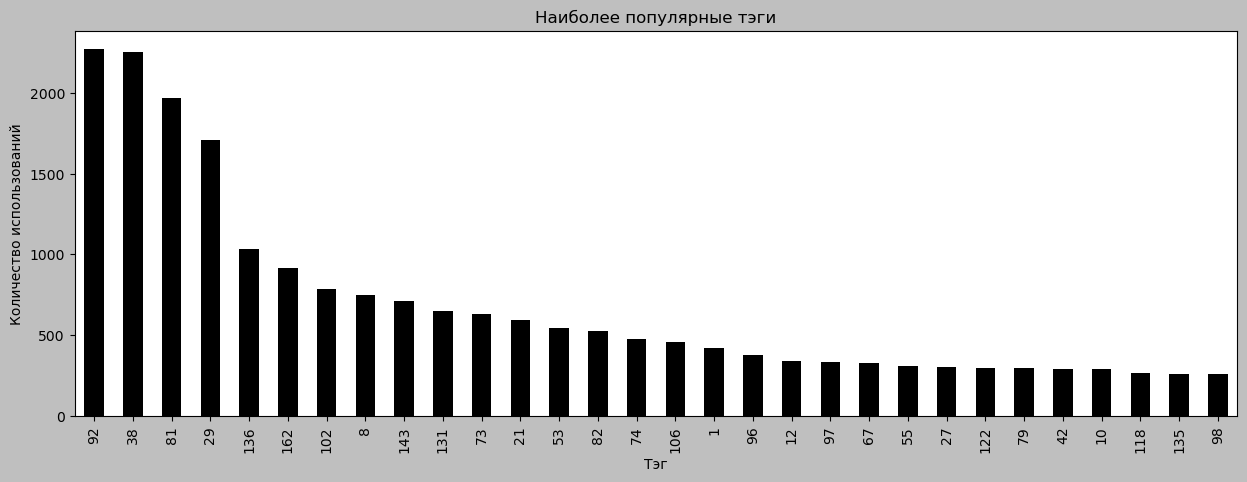

In [148]:
fig = plt.figure(figsize=(15,5))
all_tags_series.value_counts().head(30).plot.bar()
plt.title("Наиболее популярные тэги")
plt.xlabel("Тэг")
plt.ylabel("Количество использований")
plt.show()

#### **Вывод**

Наиболее встречающиеся тэги - 92, 38, 81, 29

# Анализ данных в файле `train.scv`

Описание данных в файле

`train.csv`

*   `row_id`: (int64) идентификатор строки.
*   `timestamp`: (int64) время в миллисекундах между взаимодействием пользователя с платформой и первым взаимодействием с платформой данного пользователя.
*   `user_id`: (int32) идентификатор пользователя.
*   `content_id`: (int16) идентификатор взаимодействия пользователя с платформой.
*    `content_type_id`: (int8) тип взаимодействия с платформой: 0 - ответ на вопрос, 1 - просмотре лекции.
*   `task_container_id`: (int16) идентификатор набора вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит пояснения к какому-либо из них. Все три вопроса будут иметь общий `task_container_id`.
*   `user_answer`: (int8) ответ пользователя на вопрос, если он есть. Для лекций считать -1 как null.
*   `answered_correctly`: (int8) был ли ответ пользователя на вопрос правильным. Для лекций считать -1 как null.
*    `prior_question_elapsed_time`: (float32) среднее время в миллисекундах, затраченное пользователям для ответа на каждый вопрос из предыдущего набора вопросов, без учёта лекций между наборами вопросов. Имеет значение null для 1-го набора вопросов или лекции.
*   `prior_question_had_explanation`: (bool) увидел ли пользователь объяснение и правильный ответ после ответа на предыдущий набор вопросов, без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.

Для загрузки данных в первозданном виде не хватает ОЗУ, поэтому будем сразу загружать данные с корректным dtype. Для этого создадим справочник dtypes_to_read

Также не будем считывать столбец 'row_id', в нем одержатся ворядковые номера строк, от него нет пользы. 

Для этого создадим список столбцов без него (columns_to_read), а потом считаем датасет в соответствии с этим списком

In [119]:
dtypes_to_read = {
    'timestamp': 'uint64',
    'user_id': 'uint32',
    'content_id': 'uint16',
    'content_type_id': 'int8',
    'task_container_id': 'uint16',
    'answered_correctly': 'int8',
    'user_answer': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}

columns_to_read = [
    'timestamp',
    'user_id',
    'content_id',
    'content_type_id',
    'task_container_id',
    'answered_correctly',
    'user_answer',
    'prior_question_elapsed_time',
    'prior_question_had_explanation'
]

df_t = pd.read_csv(PATH + 'train.csv', sep = ',', dtype = dtypes_to_read, usecols = columns_to_read)

Просмотрим информацию о сформированном df

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       uint64 
 1   user_id                         uint32 
 2   content_id                      uint16 
 3   content_type_id                 int8   
 4   task_container_id               uint16 
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int8(3), uint16(2), uint32(1), uint64(1)
memory usage: 2.4 GB


видим, что таблица состоит из 101230332 строк и 8 столбцов



Проверим даныне на наличие пропусков

In [ ]:
df_t.isna().sum() 

timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

Как видим, присутствуют пропуски в столбцах prior_question_elapsed_time, prior_question_had_explanation

В соответствии с заданием требуется проанализировать все характеристики датасета, поэтому начнем анализировать имеющиеся столбцы по порядку

## `train.csv` - `timestamp`

В данном столбце в соовтетствии с описанием отражается время в миллисекундах между взаимодействием пользователя с платформой и первым взаимодействием с платформой данного пользователя.

### Распределение количества взаимодействий по времени

Построим гистограмму распределения количества взаимодействий пользователей с платформой в зависимости от прошешего с момента первого взаимодействия времени. При построении укрупним время взаимодействия до дней

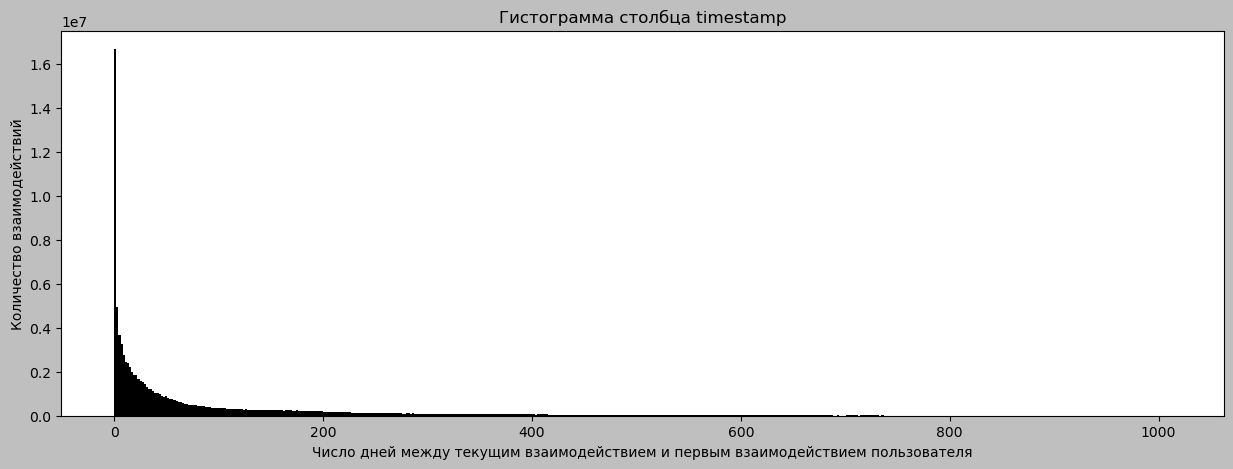

In [ ]:
fig = plt.figure(figsize=(15,5))
timestamp = df_t['timestamp']/(31536000000/365)
timestamp.plot.hist(bins = 500)
plt.title("Гистограмма столбца timestamp")
plt.xlabel("Число дней между текущим взаимодействием и первым взаимодействием пользователя")
plt.ylabel("Количество взаимодействий")
plt.show()

Удалим ненужные переменные для освобождения ОЗУ

In [ ]:
del timestamp

In [ ]:
gc.collect()

44

#### **Вывод**

количество взаимодействий резко падает спустя уже несколько дней после начала работы с платформой - отключаются люди, которые зарегистрировались и начали взаимодействовать с платформой "импульсно"

### Определение самого "старого" пользователя

In [ ]:
df_t[df_t['timestamp'] == df_t['timestamp'].max()]['user_id']

32938743    705741139
Name: user_id, dtype: uint32

Также определим время его взаимодействия с платформой в днях

In [ ]:
LONGEST_LIVE = df_t['timestamp'].max() / 1000 / 60 / 60 / 24
LONGEST_LIVE

1011.8723616782405

#### **Вывод**

Пользователь с id `705741139` работает с платформой дольше всех, а именно `1011 дней`!

### Определение топ-10 пользователей-долгожителей

Допустим, мы как владельцы платформы хотим поощрить долгожителей нашего сервиса промо-кодами для следующей оплаты подписки со скидкой. Определим список пользователей, которые ее получат

Для этого составим список уникальных пользователей и для каждого укажем время жизни на платфеорме исходя из максмального значения `timestamp` для него (`longest_lives`)

In [ ]:
longest_lives = df_t.groupby(by = 'user_id').max()['timestamp']
longest_lives

user_id
115             668090043
124                571323
2746               835457
5382           2101551456
8623            862338736
                 ...     
2147470770     2832089444
2147470777    13332685203
2147481750       55954768
2147482216     1470594073
2147482888      428692118
Name: timestamp, Length: 393656, dtype: uint64

Теперь отсортируем полученные значения и выберем 10 наибольших

In [ ]:
WINNERS = longest_lives.sort_values().tail(10).index.to_list()
WINNERS

[911965575,
 1412873735,
 277757003,
 1209880307,
 587609214,
 881103868,
 1857133602,
 1887984732,
 626308830,
 705741139]

Удалим ненужные переменные для освобождения ОЗУ

In [ ]:
del longest_lives

In [ ]:
gc.collect()

0

#### **Вывод**

Сертификаты с промо-кодами получат 10 счастливчиков с ID, указанными в списке выше

## `train.csv` - `user_id`

### Распределение пользователей по количеству взаимодействий с платформой

Чтобы более детально посмотреть на пользователей давайте опеределим распределение количества пользователей по количеству взаимодействий с платформой

Для начала определим количество уникальных пользователей (потребуется в том числе для дальнейшей перепроверки)

In [ ]:
UNIQUE_USERS = df_t['user_id'].nunique()
UNIQUE_USERS

393656

Сделаем группировку по полю `user_id` и посчитаем количество взаимодействий каждого уникального пользователя с платформой

In [ ]:
user_interactions = df_t.groupby(by = 'user_id').count()['timestamp']

Теперь сделаем группировку по количеству взаимодействий с платформой и посчитаем количество пользователей

In [ ]:
number_of_interactions = user_interactions.groupby(user_interactions).count()
number_of_interactions

timestamp
1        87
2        60
3        40
4        68
5        19
         ..
16777     1
16789     1
16851     1
16914     1
17917     1
Name: timestamp, Length: 6155, dtype: int64

Перепроверим - пользователей по прежнему должно остаться `UNIQUE_USERS`

In [ ]:
number_of_interactions.sum() == UNIQUE_USERS

True

Разделим пользователей на группы:
*   1 взаимодействие - `Случайные`
*   \<=10 взаимодействий - `Импульсные`
*   \<=100 взаимодействий - `Точечный интерес`
*   \<=1000 взаимодействий - `Постоянные`
*   \>1000 взаимодействий - `Хардкорные`

Напишем необходимую для этого функцию

In [ ]:
def find_user_group(n):
  if n == 1: return 'One-timers'
  elif n <= 10: return 'Impulsive'
  elif n <= 50: return 'Very low interest'
  elif n <= 100: return 'Low interest'
  elif n <= 500: return 'Medium interest'
  elif n <= 1000: return 'High interest'
  elif n <= 5000: return 'Regular users'
  else: return 'Hardcore'

Применим функцию для группировки пользователей по типам

In [ ]:
groups_of_interactions = number_of_interactions.groupby(lambda x: find_user_group(x)).sum().sort_values()
groups_of_interactions

timestamp
One-timers               87
Hardcore               1968
Impulsive              2882
Regular users         21517
High interest         21679
Low interest          50478
Medium interest       79033
Very low interest    216012
Name: timestamp, dtype: int64

Построим столбчатую диаграмму количества пользователей в зависимости от типа

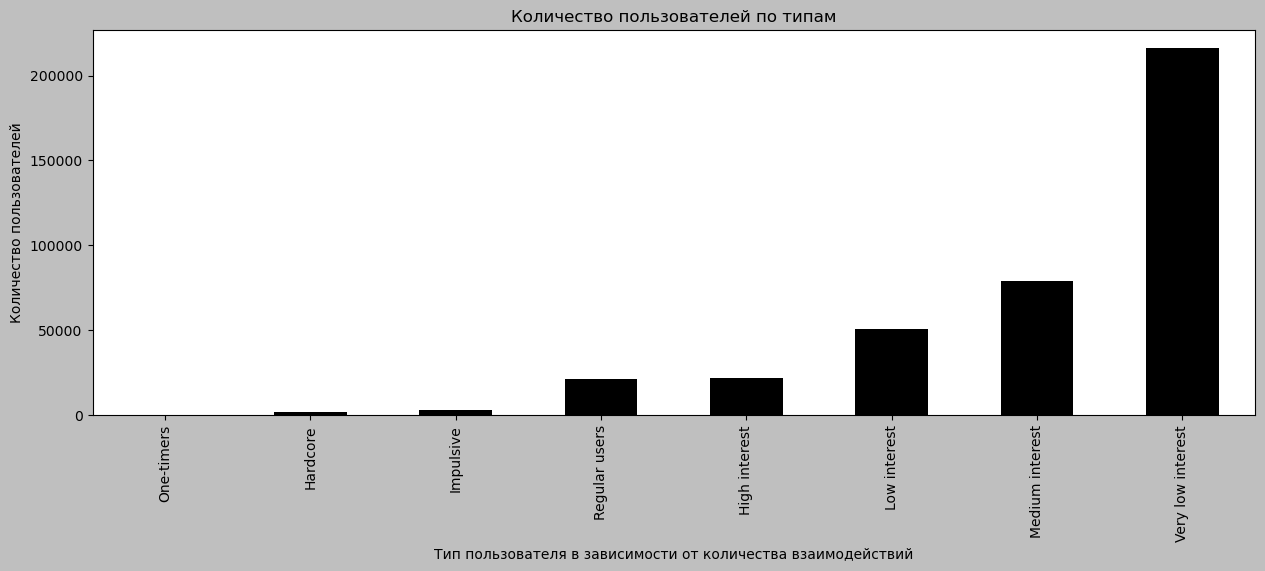

In [ ]:
fig = plt.figure(figsize=(15,5))
groups_of_interactions.plot.bar()
plt.title("Количество пользователей по типам")
plt.xlabel("Тип пользователя в зависимости от количества взаимодействий")
plt.ylabel("Количество пользователей")
plt.show()

Удалим ненужные переменные для освобождения ОЗУ

In [ ]:
del groups_of_interactions

In [ ]:
del user_interactions

In [ ]:
gc.collect()

32936

#### **Вывод**

подавляющее количетсво пользователей взаимодейтсвует с платформой от 10 до 50 раз

## `train.csv` - `content_id`

В соответствии с описанием признак содержит идентификаторы контента взаимодействия пользователей с платформой

Определим количество уникальных идентификаторов

In [ ]:
UNIQUE_CONTENT_IDS = df_t['content_id'].nunique()
UNIQUE_CONTENT_IDS

13782

### Наиболее популярный у пользователей плтатформы контент

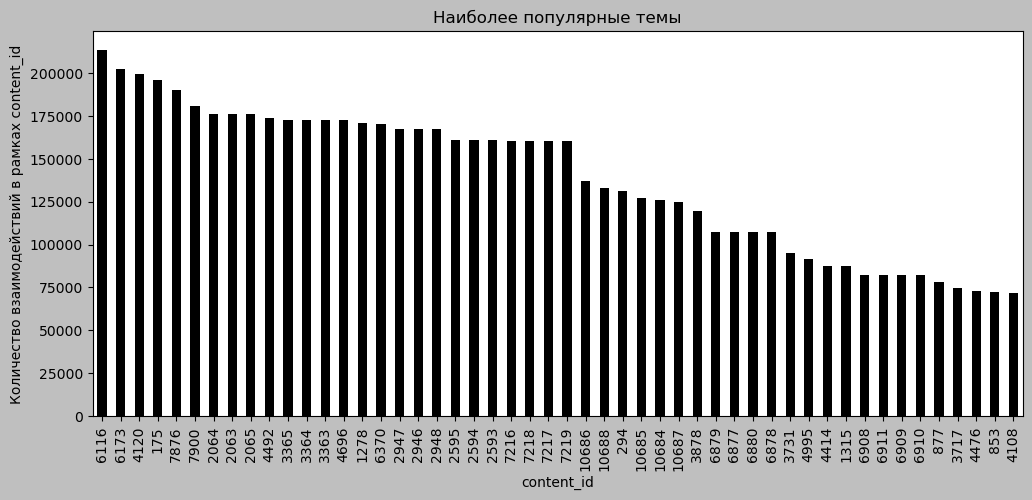

In [ ]:
plt.figure(figsize=(12,5))
df_t['content_id'].value_counts().head(50).plot.bar()
plt.title('Наиболее популярные темы')
plt.xlabel('content_id')
plt.ylabel('Количество взаимодействий в рамках content_id')
plt.xticks(rotation=90)
plt.show()

#### **Вывод**

На вышепредставленном графике определены наиболее популярные у пользователей лекции / вопросы

### Соотношение вопросов и лекций

Определим соотношение вопросов и лекций. 

Для этого сначала проведем группировку по полю `content_id`, затем по полю `content_type_id`

In [ ]:
df_t_unique_content = df_t.groupby('content_id', as_index = False)['content_type_id'].last() # Группировка по полю content_id
df_t_content_type_statistics = df_t_unique_content.groupby('content_type_id').count() # Группировка по полю content_type_id
df_t_content_type_statistics.index = ['Вопрос', 'Лекция'] # Заменяем индексы на более наглядные
df_t_content_type_statistics

,content_id
Вопрос,13446
Лекция,336


Общее количество уникального контента для сверки

In [ ]:
df_t['content_id'].nunique()

13782

Проверим, что общее количество совпадает

In [ ]:
int(df_t_content_type_statistics.sum()) == df_t['content_id'].nunique()

True

Попробуем посчитать количество вопросов и лекций другим способом - через фильтрацию по полю `content_type_id`

In [ ]:
LECTURES = df_t[df_t["content_type_id"] == 1]["content_id"].nunique()
QUESTIONS = df_t[df_t["content_type_id"] == 0]["content_id"].nunique()

print(LECTURES)
print(QUESTIONS)

415
13523


Обратим внимание, что цифры не совпадают с ранее определенными нами. Пр всей видимости, эито связано с тем, что у некоторого контента в датасете в разных строка указаны разные значения атрибута `content_type_id`.

Попробоуем определить список таких `content_id`

Составим списки уникальных значений атрибута `content_id` для лекций и вопросов с помощью фильтрации атрибута `content_type_id`

In [ ]:
UNIQUE_LECTURES = list(df_t[df_t["content_type_id"] == 1]["content_id"].values)
UNIQUE_QUESTIONS = list(df_t[df_t["content_type_id"] == 0]["content_id"].values)

Определим пересекающиеся значения

In [ ]:
QUESTIONABLE_CONTENT = list(set(UNIQUE_LECTURES) & set(UNIQUE_QUESTIONS))
print("Найдено " + str(len(QUESTIONABLE_CONTENT)) + " уникальных единиц контента с неопределенным типом, что составляет " 
      + str(round(len(QUESTIONABLE_CONTENT) / df_t['content_id'].nunique(), 3)) + "% от общего числа единиц контента")
print(QUESTIONABLE_CONTENT)

Найдено 156 уникальных единиц контента с неопределенным типом, что составляет 0.011% от общего числа единиц контента
[5120, 2049, 4100, 8708, 12294, 3078, 12811, 8207, 4118, 13336, 7704, 9245, 9758, 12831, 2084, 8233, 3113, 3625, 4652, 12846, 8240, 3123, 1077, 5694, 12354, 13379, 1604, 13384, 6220, 4173, 3153, 1105, 3668, 89, 4187, 8288, 4705, 11873, 100, 10852, 11877, 9831, 6761, 7785, 9835, 3697, 10354, 8821, 1144, 5240, 5752, 8317, 8320, 9856, 8330, 6797, 10382, 10383, 12942, 5266, 6808, 13471, 9896, 6316, 13487, 10928, 12469, 3255, 12472, 185, 192, 1731, 3780, 7877, 2771, 7385, 8411, 3803, 12509, 11485, 1253, 2278, 12007, 2282, 7920, 7926, 761, 2299, 9477, 3852, 8461, 7949, 8976, 8977, 4883, 2327, 10010, 1308, 6948, 11559, 3879, 2857, 10540, 814, 10032, 7477, 10040, 317, 8513, 10052, 4425, 335, 6481, 13138, 9554, 2904, 4441, 10075, 11772, 12638, 1887, 7008, 3937, 7010, 2918, 5990, 12655, 1907, 11151, 12187, 1450, 2476, 1967, 7097, 10688, 6081, 10180, 13256, 8138, 5588, 6101, 9174, 

Определим общее количество некорректных строк в исходных данных и их долю в общем количестве строк

In [ ]:
print(df_t[df_t['content_id'].isin(QUESTIONABLE_CONTENT)].shape[0])
print(df_t[df_t['content_id'].isin(QUESTIONABLE_CONTENT)].shape[0] / df_t.shape[0])

2055928
0.02030940686828924


В идеале нужно удалить строки с некорректными данными. Но в рамках исследовательских целей данной работы, оставим эти данные в датафрейме, тем более их доля невелика - 2%

Построим столбчатую диаграмму для демонстрации соотношения вопросов и лекций

<Figure size 1200x500 with 0 Axes>

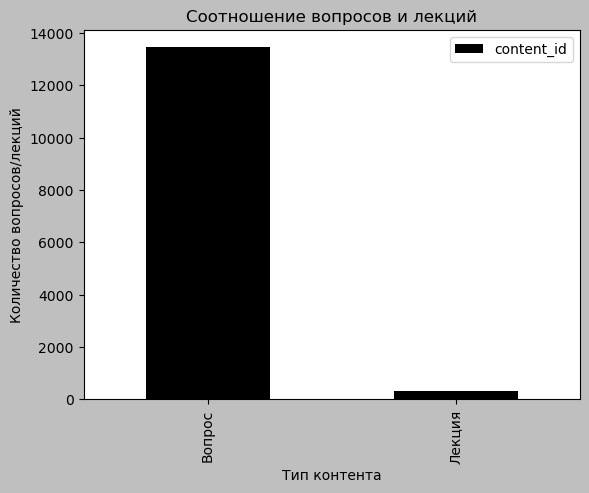

In [ ]:
plt.figure(figsize=(12,5))
df_t_content_type_statistics.plot.bar()
plt.title('Соотношение вопросов и лекций')
plt.xlabel('Тип контента')
plt.ylabel('Количество вопросов/лекций')
plt.xticks(rotation=90)
plt.show()

Определим среднее количество вопросов, приходящихся на одну лекцию

In [ ]:
QUESTION_RATE = int(round(df_t_content_type_statistics.iloc[0] / df_t_content_type_statistics.iloc[1]))
QUESTION_RATE

40

Удалим ненужные переменные для освобождения памяти

In [ ]:
del df_t_content_type_statistics

In [ ]:
del df_t_unique_content

In [ ]:
del UNIQUE_QUESTIONS

In [ ]:
del UNIQUE_LECTURES

In [ ]:
gc.collect()

14498

#### **Вывод**

На платформе 13 446 вопросов и 336 лекций
Среднее количество вопросов, приходящихся на одну лекцию - 40

В исходных данных содержатся ошибки  - у части контента (если быть точным 156 единиц контента, что составляет 0.011% от общего количества единиц контента) указаны противоречивые данные по его типу - есть записи, в которых контент указан как вопрос, есть записи, в которых контент указан как лекция. 
Всего строк с ошибочными данными - 2 055 928, что составляет 2% от общего количества записей в исходных данных

## `train.csv` - `content_type_id`

### Общее соотношение ответов на вопросы и чтения лекций на платформе

In [ ]:
df_t_total_interactions_by_contenet_type = df_t['content_type_id'].value_counts()
df_t_total_interactions_by_contenet_type.index = ['Вопрос', 'Лекция'] # Заменяем индексы на более наглядные
df_t_total_interactions_by_contenet_type

Вопрос    99271300
Лекция     1959032
Name: content_type_id, dtype: int64

Построим круговую диаграмму для демонстрации соотношения общего количества ответов на вопросы и просмотра лекций на платформе

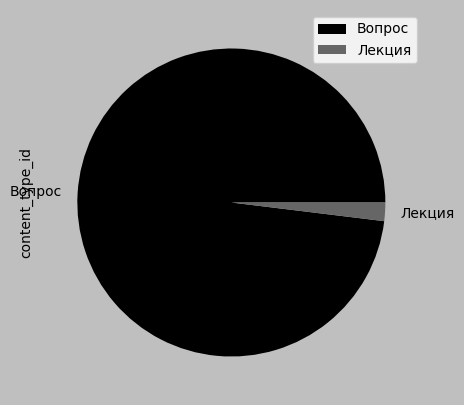

In [ ]:
plt.figure(figsize=(12,5))
df_t_total_interactions_by_contenet_type.plot.pie()
plt.legend()
plt.show()

Удалим переменную `df_t_total_interactions_by_contenet_type` для освобождения памяти

In [ ]:
del df_t_total_interactions_by_contenet_type

In [ ]:
gc.collect()

2566

#### **Вывод**

Исследовано соотношение общего количества ответов на вопросы и просмотра лекций на платформе 

## `train.csv` - `task_container_id`

Это номер контейнера для нескольких задач/лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснения к любому из них. Все эти три вопроса будут иметь общий идентификатор `task_container_id`



### Наиболее популярные наборы вопросов

Посмотрим на самые "популярные" наборы вопросов

In [ ]:
df_t['task_container_id'].value_counts().head(30)

14    804285
15    798539
4     692079
5     690051
6     688813
7     684275
11    403521
10    400660
8     400019
9     399641
0     395990
1     395934
2     395595
3     395341
12    393358
13    388645
16    327490
17    308415
18    298483
19    292249
20    284771
21    275403
22    272569
23    269563
24    268550
25    267958
26    256507
27    248244
28    243847
29    239636
Name: task_container_id, dtype: int64

Видно, что наиболее популярные наборы вопросов по номеру - в начале, что вполне логично, на первые вопросы отвечает большинство пользователей платформы, до конца доходит не каждый. Для более наглядной демонстрации построим гистограмму распределения

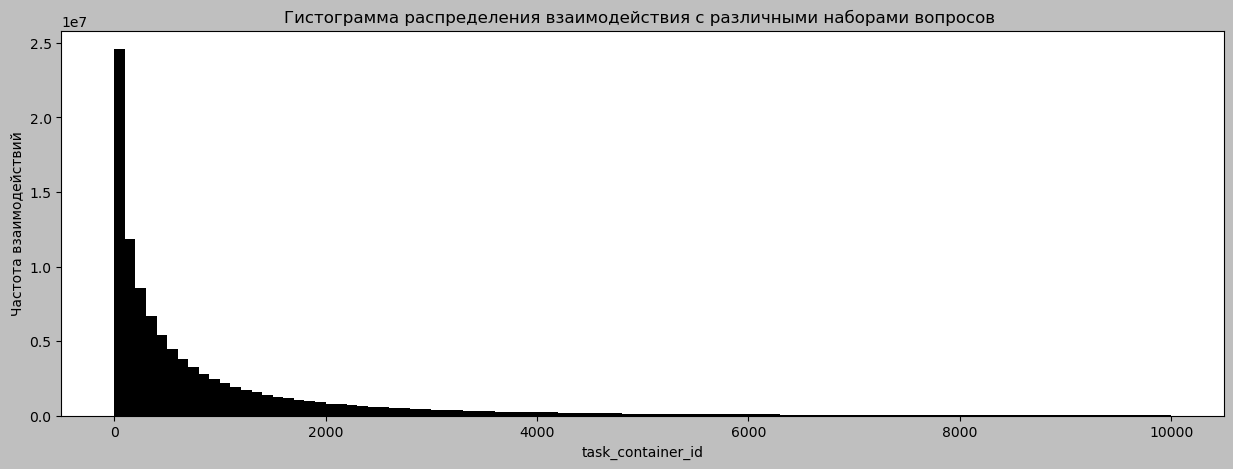

In [ ]:
fig = plt.figure(figsize=(15,5))
df_t['task_container_id'].plot.hist(bins=100)
plt.title("Гистограмма распределения взаимодействия с различными наборами вопросов ")
plt.xlabel("task_container_id")
plt.ylabel("Частота взаимодействий")
plt.show()

#### **Вывод**

Наиболее популярные наборы вопросов по номеру - в начале, что вполне логично, на первые вопросы отвечает большинство пользователей платформы, до конца доходит не каждый. Для более наглядной демонстрации построим гистограмму распределения

## `train.csv` - `user_answer`

В атрибуте содержится ответ пользователя на вопрос, если он есть. Для лекций считать -1 как null

### Наиболее популярные ответы

Посмотрим на рспределение ответов по вариантам ответа

In [ ]:
gc.collect()

3719

In [ ]:
ANSWERS = df_t['user_answer'].value_counts()
ANSWERS

 0    28186489
 1    26990007
 3    26084784
 2    18010020
-1     1959032
Name: user_answer, dtype: int64

Уберем из серии запись с индексом -1, в которой посчитано количество взаимодействий с лекциями

In [ ]:
ANSWERS = ANSWERS.drop(index = -1,axis = 1)
ANSWERS

0    28186489
1    26990007
3    26084784
2    18010020
Name: user_answer, dtype: int64

Построим круговую диаграмму для демонстрации долей различных ответов

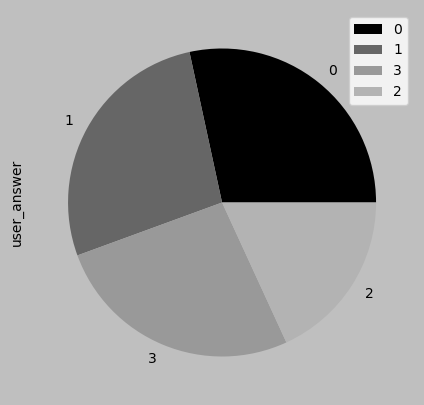

In [ ]:
plt.figure(figsize=(12,5))
ANSWERS.plot.pie()
plt.legend()
plt.show()

Видим, что по какой-то причине 2 вариант ответа в сренднем выбирают меньше

В качестве гипотезы можно выдвинуть предположение, что в среднем правильный ответ в варианте 2 содержится меньше.

In [ ]:
df_t_filtered = df_t[df_t['answered_correctly'] == 1]

In [ ]:
df_t_filtered['user_answer'].value_counts()

0    18541782
1    17478056
3    17182318
2    12042471
Name: user_answer, dtype: int64

Построим круговую диаграмму для демонстрации долей правильных ответов 

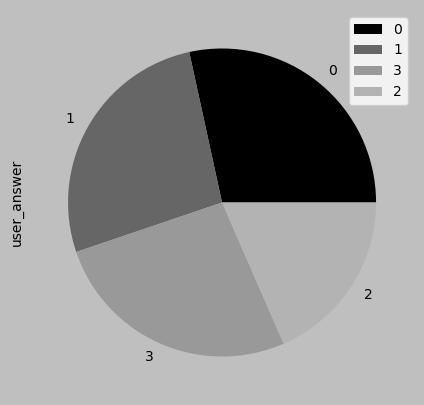

In [ ]:
plt.figure(figsize=(12,5))
df_t_filtered['user_answer'].value_counts().plot.pie()
plt.legend()
plt.show()

Удалим ненужные переменные для освобождения ОЗУ

In [ ]:
del df_t_filtered
del ANSWERS

In [ ]:
gc.collect()

6014

Гипотеза подтверждается - действительно, вариант ответа 2 реже бывает правильным

#### **Вывод**

Все ответы встречаются примерно в равной пропорции, кроме ответа 2 - он встречается реже из за того, что в варианте 2 реже содержится правильный ответ

## `train.csv` - `answered_correctly`

В атрибуте содерджится информация о том, был ли данный пользователем ответ правильным или нет, или же это была лекция

### Соотношение правильных и неправильных ответов

In [ ]:
RIGHT_ANSWERS = df_t[df_t['answered_correctly'] != -1]['answered_correctly'].value_counts(normalize=True)[1]*100
WRONG_ANSWERS = df_t[df_t['answered_correctly'] != -1]['answered_correctly'].value_counts(normalize=True)[0]*100

print(RIGHT_ANSWERS)
print(WRONG_ANSWERS)

65.72355454194717
34.27644545805283


66% попыток ответить корректно на вопрос завершилось успехом

Удалим ненужные переменные для освобождения ОЗУ

In [ ]:
del RIGHT_ANSWERS
del WRONG_ANSWERS

In [ ]:
gc.collect()

0

#### **Вывод**

66% попыток ответить корректно на вопрос завершилось успехом

## `train.csv` - `prior_question_elapsed_time`

В соответствии с описанием переменных атрибут отражает среднее время в миллисекундах, затраченное пользователям для ответа на каждый вопрос из предыдущего набора вопросов, без учёта лекций между наборами вопросов. Имеет значение null для 1-го набора вопросов или лекции

### Распределение времени ответа

Для более корректного проведения дальнейшего анализа требуется удалить строки с пустыми значениями из датасета.

Создадим копию df для дальнейших манипуляций

In [ ]:
df_t_2 = df_t.copy()

Найдем количество пропусков

In [ ]:
df_t_2['prior_question_elapsed_time'].isnull().sum()

2351538

В датасете 2 351 538 строк с пустым значением атрибута `prior_question_elapsed_time`. Удалим их из датасета

In [ ]:
df_t_2.dropna(subset=['prior_question_elapsed_time'], inplace = True)

Посмотрим на распределение атрибута с помощью построения гистограммы. Построим гистограмму распределения времени. Для этого сначала переведем милисекунды в минуты

In [ ]:
df_t_2['prior_question_elapsed_time'] = df_t_2['prior_question_elapsed_time'] / 60000

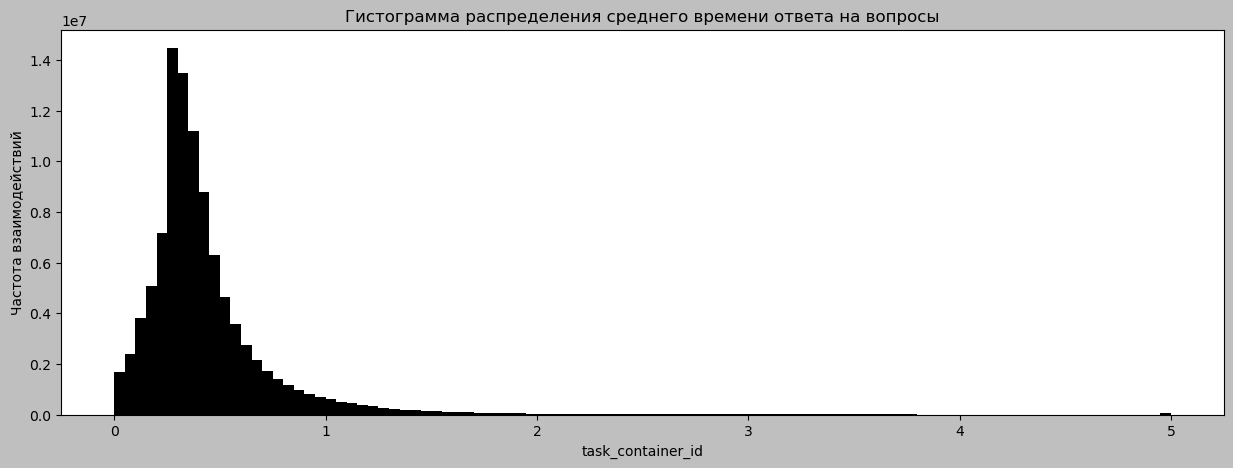

In [ ]:
fig = plt.figure(figsize=(15,5))
df_t_2['prior_question_elapsed_time'].plot.hist(bins = 100)
plt.title("Гистограмма распределения среднего времени ответа на вопросы")
plt.xlabel("task_container_id")
plt.ylabel("Частота взаимодействий")
plt.show()

Также посмотрим на статистику по данному полю

In [ ]:
df_t_2['prior_question_elapsed_time'].describe()

count    9.887879e+07
mean     4.237308e-01
std      3.551126e-01
min      0.000000e+00
25%      2.666667e-01
50%      3.500000e-01
75%      4.944333e-01
max      5.000000e+00
Name: prior_question_elapsed_time, dtype: float64

Из представленных данных видно, что время, затрачиваемое подавляющим числом пользователей для ответа на вопросы составляет менее 1 минуты. Максимальное время - 5 минут

#### **Вывод**

Большинство пользователей тратит не более минуты, чтобы ответить на вопрос. Максимальное время ответа - 5 минут.

### Зависимость между правильными ответами и временем, затраченным на ответ

Попробуем исследовать зависимость правильности ответа от времени, затраченного на него

In [ ]:
df_t['answered_correctly'].corr(df_t['prior_question_elapsed_time'])

-0.007900239787032895

По значению коэффициента корелляции видим, что зависимость практически отсутствует

#### **Вывод**

Зависимость между правильностью ответов и затраченным временем на них правктически отсутствует.

Удалим ненужные переменные для освобождения ОЗУ

In [ ]:
del df_t_2

In [ ]:
gc.collect()

9093

## `train.csv` - `prior_question_had_explanation`

Атрибут показывает, видел ли пользователь объяснение и правильный ответ после ответа на предыдущий набор вопросов, без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.

### Соотношение ответов с просмотром и без

В соответствии с описанием в данном атрибут также содержатся пустые значения, поэтому проведем манипуляции аналогично предыдущему атриубуту

In [125]:
df_t_2 = df_t.copy()

In [ ]:
df_t_2['prior_question_had_explanation'].isnull().sum()

392506

Видим, что пусиых записей значительно меньше, чем в предыдущем атрибуте, но все равно, лучше от них избавиться при проведении анализа

In [ ]:
df_t_2.dropna(subset=['prior_question_had_explanation'], inplace = True)

Теперь посмотрим на соотношение количества отвеченных вопросов с предварительным просмотром ответов на предыдущие вопросы и количества отвеченных вопросов без предварительного просмотра ответов на предыдущие вопросы.

Для этого построим круговую диаграмму

In [ ]:
df_t_2['prior_question_had_explanation'].value_counts()

True     89685560
False    11152266
Name: prior_question_had_explanation, dtype: Int64

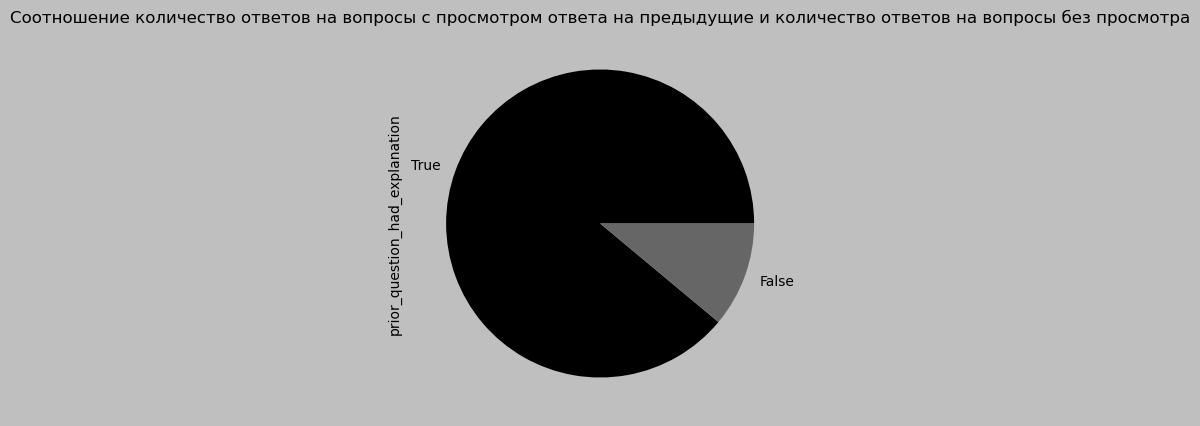

In [ ]:
plt.figure(figsize=(12,5))
df_t_2['prior_question_had_explanation'].value_counts().plot.pie()
plt.title('Соотношение количество ответов на вопросы с просмотром ответа на предыдущие и количество ответов на вопросы без просмотра')
plt.show()

Посчитаем долю

In [ ]:
VIEW_RATE = df_t_2['prior_question_had_explanation'].value_counts()[True] / df_t_2['prior_question_had_explanation'].value_counts().sum() * 100
VIEW_RATE

88.94039425245046

#### **Вывод**

89% ответов на вопросы были даны после просмотра ответа на предыдущие вопросы

### Зависимость правильности ответа от просмотра ответа на предыдущие вопросы

Исследуем зависимость правильности ответа от просмотра ответа на предыдущие вопросы

Рассчитаем долю правильных ответов после просмотра ответов и без просмотра ответов

In [130]:
df_t_2[(df_t_2['prior_question_had_explanation'] == True) & (df_t_2['answered_correctly'] != -1)]['answered_correctly'].value_counts(normalize = True) * 100

1    67.31885
0    32.68115
Name: answered_correctly, dtype: float64

In [131]:
df_t_2[(df_t_2['prior_question_had_explanation'] == False) & (df_t_2['answered_correctly'] != -1)]['answered_correctly'].value_counts(normalize = True) * 100

1    50.062894
0    49.937106
Name: answered_correctly, dtype: float64

#### **Вывод**

Видим, что в случае просмотра ответа на предыдущие вопросы, пользователи платформы отвечают значительно лучше 67% правильных ответов против 50%